# 导师制名企实训班商业智能方向 004期 Lesson 19

### Action 1： 资金流入流出预测
https://tianchi.aliyun.com/competition/entrance/231573/information  
数据集一共包括4张表：用户基本信息数据、用户申购赎回数据、收益率表和银行间拆借利率表  
2.8万用户，284万行为数据，294天拆解利率，427天收益率  
2013-07-01到2014-08-31，预测2014年9月的申购和赎回  



In [1]:
# 引包
import pandas as pd
import numpy as np
import datetime

In [2]:
# 数据加载
data = pd.read_csv('data/user_balance_table.csv', parse_dates=['report_date'])
data.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


### 基于规则的方法

In [3]:
# 筛选从2014-03-01之后的数据
def get_total_balance(data, begin):
    # 将data进行备份，在copy数据上进行操作
    df_temp = data.copy()
    # 按照report_date进行聚合
    df_temp = df_temp.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
    # 还原索引
    df_temp.reset_index(inplace=True)
    df_temp = df_temp[(df_temp['report_date'] >= begin)]
    return df_temp

total_balance = get_total_balance(data, '2014-03-01')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [4]:
# 给数据添加时间维度
def add_timestamp(data):
    # 时间格式转换
    data['report_date'] = pd.to_datetime(data['report_date'], format='%Y%m%d')
    # 添加时间维度
    data['day'] = data['report_date'].dt.day
    data['month'] = data['report_date'].dt.month
    data['year'] = data['report_date'].dt.year
    data['week'] = data['report_date'].dt.week
    data['weekday'] = data['report_date'].dt.weekday
    return data

In [5]:
# 生成测试数据
def generate_test_data(data):
    # 在copy数据上进行操作
    total_balance = data.copy()
    # 生成2014-09-01到2014-09-30的数据
    start = datetime.datetime(2014,9,1)
    end = datetime.datetime(2014,10,1)
    testdata = []
    while start != end:
        # 3个字段： date，total_purchase_amt, total_redeem_amt
        temp = [start, np.nan, np.nan]
        testdata.append(temp)
        # 日期+1
        start = start + datetime.timedelta(days=1)
    #封装testdata
    testdata = pd.DataFrame(testdata)
    testdata.columns = total_balance.columns
    result = pd.concat([total_balance, testdata], axis=0)
    return result

total_balance = generate_test_data(total_balance)

In [6]:
# 对total_banance添加时间维度
total_balance = add_timestamp(total_balance)
total_balance

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
243,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5
244,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6
245,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0
246,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1
247,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2
...,...,...,...,...,...,...,...,...
25,2014-09-26,NaN,NaN,26,9,2014,39,4
26,2014-09-27,NaN,NaN,27,9,2014,39,5
27,2014-09-28,NaN,NaN,28,9,2014,39,6
28,2014-09-29,NaN,NaN,29,9,2014,40,0


In [7]:
data1 = add_timestamp(data)

In [8]:
# 0代表周一，6代表周日
data['weekday'].value_counts()

6    410701
5    408824
4    407509
3    405907
2    404159
1    402536
0    400785
Name: weekday, dtype: int64

In [9]:
def get_total_balance(data, begin):
    # 在copy数据上进行操作
    df_temp = data.copy()
    # 按照date进行聚合
    df_temp = df_temp.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
    # 还原date字段，重新索引
    df_temp.reset_index(inplace=True)
    df_temp = df_temp[df_temp['report_date'] >= begin]
    return df_temp

In [10]:
# 筛选从2014-04-01之后的数据 作为平稳数据
total_balance = get_total_balance(data, '2014-03-01')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [11]:
import datetime
import numpy as np
# 生成测试数据
def generate_test_data(data):
    # 在copy数据上进行操作
    total_balance = data.copy()
    # 生成2014-09-01到2014-09-30的数据
    start = datetime.datetime(2014, 9, 1)
    end = datetime.datetime(2014, 10, 1)
    test_data = []
    while start != end:
        # 添加3个字段，date， total_purchase_amt, total_redeem_amt
        temp = [start, np.nan, np.nan]
        test_data.append(temp)
        # 日期 + 1
        start += datetime.timedelta(days=1)        
    # 封装test_data
    test_data = pd.DataFrame(test_data)
    test_data.columns = total_balance.columns
    # 将test_data合并到total_balance中
    total_balance = pd.concat([total_balance, test_data], axis=0)
    return total_balance

In [12]:
total_balance = generate_test_data(total_balance)

In [13]:
# 对total_balance添加时间维度
total_balance = add_timestamp(total_balance)

In [14]:
# 使用chinese_calendar 对日期进行修正
import datetime
from chinese_calendar import is_workday, is_holiday
total_balance['is_holiday'] = total_balance['report_date'].apply(lambda x: is_holiday(x))
# 将True和False映射为1和0
total_balance['is_holiday'] = total_balance['is_holiday'].replace({True:1, False:0})
total_balance.head()

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday,is_holiday
243,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5,1
244,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6,1
245,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0,0
246,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1,0
247,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2,0


In [15]:
backup = total_balance.copy()

In [16]:
total_balance = backup.copy()

In [17]:
weekday_weight = total_balance[['weekday', 'total_purchase_amt', 'total_redeem_amt']].groupby('weekday', as_index=False).mean()
weekday_weight = weekday_weight.rename(columns={'total_purchase_amt': 'purchase_weekday',
                                               'total_redeem_amt': 'redeem_weekday'})
weekday_weight

,weekday,purchase_weekday,redeem_weekday
0,0,3.273693e+08,3.456808e+08
1,1,3.340518e+08,3.221266e+08
2,2,3.213877e+08,3.181960e+08
3,3,3.146910e+08,2.821480e+08
4,4,2.492893e+08,2.680463e+08
5,5,1.958666e+08,1.840544e+08
6,6,1.966477e+08,2.093138e+08


In [18]:
weekday_weight['purchase_weekday'] /= np.mean(total_balance['total_purchase_amt'])
weekday_weight['redeem_weekday'] /= np.mean(total_balance['total_redeem_amt'])

In [19]:
total_balance = pd.merge(total_balance, weekday_weight, on='weekday', how='left')
total_balance

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday,is_holiday,purchase_weekday,redeem_weekday
0,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5,1,0.709237,0.669791
1,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6,1,0.712065,0.761712
2,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0,0,1.185411,1.257964
3,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1,0,1.209608,1.172248
4,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2,0,1.163752,1.157944
...,...,...,...,...,...,...,...,...,...,...,...
209,2014-09-26,NaN,NaN,26,9,2014,39,4,0,0.902682,0.975445
210,2014-09-27,NaN,NaN,27,9,2014,39,5,1,0.709237,0.669791
211,2014-09-28,NaN,NaN,28,9,2014,39,6,0,0.712065,0.761712
212,2014-09-29,NaN,NaN,29,9,2014,40,0,0,1.185411,1.257964


In [20]:
# 计算日期因子
# 统计周一到周日，在1-31号中出现的频次['weekday', 'day']出现的频次
weekday_count = total_balance[['report_date', 'day', 'weekday']].groupby(['day', 'weekday'], as_index=False).count()
weekday_count = pd.merge(weekday_count, weekday_weight, on='weekday')

In [21]:
# 日期计算 = 周期因子 * （周一到周日在1-31日中出现的频次）/一共有几个月
weekday_count['purchase_weekday'] = weekday_count['purchase_weekday'] * weekday_count['report_date'] / len(np.unique(total_balance['month']))
weekday_count['redeem_weekday'] = weekday_count['redeem_weekday'] * weekday_count['report_date'] / len(np.unique(total_balance['month']))

In [22]:
# 得到日期因子
day_rate = weekday_count.drop(['weekday', 'report_date'], axis=1).groupby('day', as_index=False).sum()

In [23]:
# 按照日期day，计算均值，即1号的均值，2号的均值。。。
day_mean = total_balance[['day', 'total_purchase_amt', 'total_redeem_amt']].groupby('day', as_index=False).mean()

In [24]:
day_pred = pd.merge(day_mean, day_rate, on='day', how='left')
day_pred['total_purchase_amt'] /= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] /= day_pred['redeem_weekday']

In [25]:
for index, row in day_pred.iterrows():
    if row['day'] == 31:
        break
    # 添加日期字段 report_date
    day_pred.loc[index, 'report_date'] = pd.to_datetime('2014/09/'+str(int(row['day'])))

In [26]:
# 利用周期因子，进行 base * 周期因子 = 预测结果
day_pred['weekday'] = day_pred['report_date'].dt.weekday

In [27]:
day_pred = day_pred[['day', 'total_purchase_amt', 'total_redeem_amt', 'report_date', 'weekday']]

In [28]:
day_pred = pd.merge(day_pred, weekday_weight, on='weekday')

In [29]:
day_pred['total_purchase_amt'] *= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] *= day_pred['redeem_weekday']

In [30]:
# 按照日期report_date 从小到大进行排序
day_pred = day_pred.sort_values('report_date')[['report_date', 'total_purchase_amt', 'total_redeem_amt']]

In [31]:
day_pred['report_date'] = day_pred['report_date'].apply(lambda x:str(x).replace('-','')[0:8])
day_pred.head()

,report_date,total_purchase_amt,total_redeem_amt
0,20140901,3.819439e+08,2.938111e+08
5,20140902,2.981538e+08,2.507790e+08
10,20140903,3.360825e+08,3.401504e+08
14,20140904,3.492969e+08,2.869627e+08
18,20140905,2.958247e+08,2.514977e+08


In [32]:
# 保存结果
day_pred.to_csv('prophet_rule.csv', header=None, index=False)

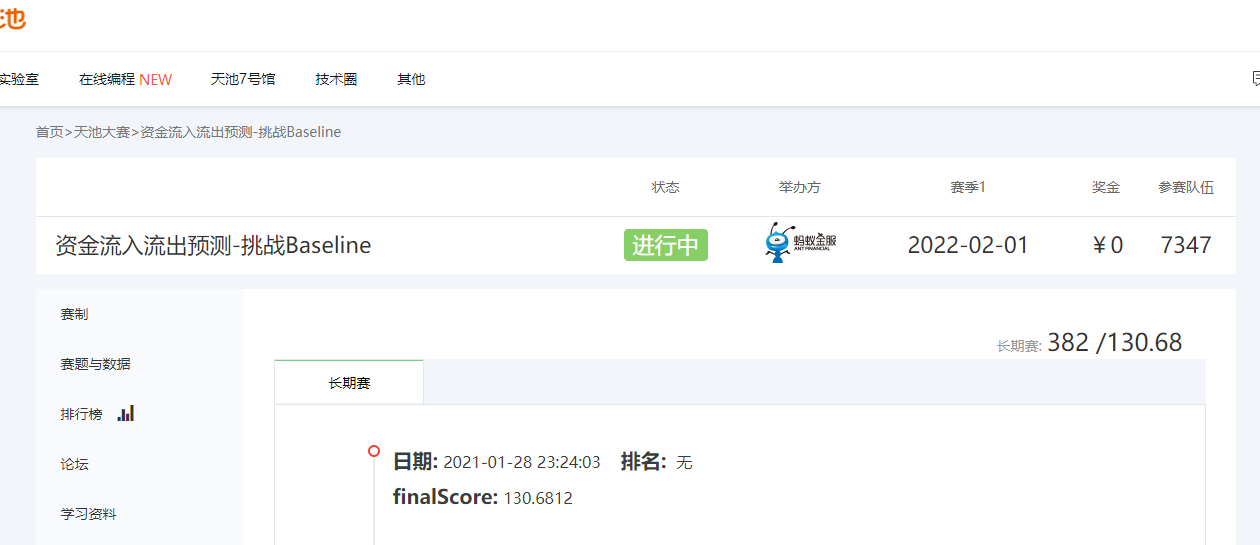

### Action 2: 新闻内容自动提取及呈现
输入任意的新闻网址，对其进行：  
1）抓取正文内容，对非中文内容进行清洗  
2）文章关键词  
3）文章摘要，即关键句  
4）词云可视化  

In [33]:
import re
import requests
import jieba
import jieba.posseg as pseg
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from textrank4zh import TextRank4Keyword, TextRank4Sentence

In [44]:
# 请求url
# url = 'https://3w.huanqiu.com/a/c36dc8/3xqGPRBcUE6?agt=8'
url = 'https://baijiahao.baidu.com/s?id=1690273548293450632'

In [45]:
html = requests.get(url, timeout=10)
content = html.content

In [46]:
# 通过content创建解析对象
soup = BeautifulSoup(content, 'html.parser', from_encoding='utf-8')
text = soup.get_text()

In [47]:
# 获取人物、地点
words = pseg.lcut(text)
# 人物集合
news_person = {word for word, flag in words if flag=='nr'}
news_place = {word for word, flag in words if flag=='ns'}
print('新闻中的人物:', news_person)
print('新闻中的地点:', news_place)

新闻中的人物: {'圣保罗', '莫成雄', '福奇', '石家庄', '斯皮尔'}
新闻中的地点: {'费尔南多', '中国', '美国', '新加坡', '马来西亚', '巴西', '美', '英国', '印度', '京'}


In [48]:
# 提取中文以及相关标点
text = re.sub('[^[\u4e00-\u9fa5。，！：、]{3,}', '', text)

In [49]:
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['时候','一份','现在','不是','其他','对此','作用','一起']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

In [50]:
# 生成词云
def create_word_cloud(f):
    f = remove_stop_words(f)
    seg_list = jieba.lcut(f)
    cut_text = " ".join(seg_list)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
        font_path = 'data/msyh.ttf'
    )
    wordcloud = wc.generate(cut_text)
    wordcloud.to_file("wordcloud.jpg")

In [51]:
create_word_cloud(text)

![jupyter](wordcloud.jpg)

In [52]:
# 输出关键词，设置文本小写，窗口为2
tr4w = TextRank4Keyword()
tr4w.analyze(text=text, lower=True, window=3)
print('关键词：')
for item in tr4w.get_keywords(20, word_min_len=2):
    print(item.word, item.weight)

关键词：
病毒 0.033718775158306714
巴西 0.02277635507310212
新冠 0.017197674112114633
可能 0.015957096305814544
传播 0.015579282802513767
感染 0.015157603908983094
发现 0.012085871028705043
变异 0.011792682923754214
目前 0.011024148618230561
帐号 0.010669084747845014
意见反馈 0.010086875178215663
确诊 0.010053386531304631
正在 0.009483438425830108
文章 0.009141235896790115
从容 0.009045541388382561
人员 0.008853557742826796
研究 0.00865439747424147
病例 0.008518568524530132
北大清华 0.008112268388697264
环球网 0.00800907952794137


In [53]:
# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source = 'all_filters')
print('摘要：')
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=3):
    # index是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

摘要：
17 0.08588766924888239 变异新冠病毒可能已在巴西境内传播开来「战疫全时区」印度新增确诊逾万例 累计超万例马来西亚一医院48名医护人员感染新冠病毒福奇：英国发现的变种新冠病毒或将成为在美传播的主要毒株变异新冠病毒已在美国传播 又一军舰现集体感染设为首页使用百度前必读 意见反馈 京证号 京公网安备号返回顶部请输入问题描述请填写联系方式
2 0.08091452269735619 中新网1月30日电 据新加坡《联合早报日报道，近日，巴西研究人员发现两名同时感染两种变异新冠病毒的确诊者，这是全球首个证实两个毒株同时出现在患者体内的个案
1 0.07268473794768077 百度首页登录个人中心帐号设置意见反馈退出巴西发现两患者同时感染两种变异新冠病毒环球网发布时间：环球网官方帐号本文转自【中国新闻网】
